In [66]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



Dataset load

Description: Here we will work with MNIST fashion dataset.

Label : 3


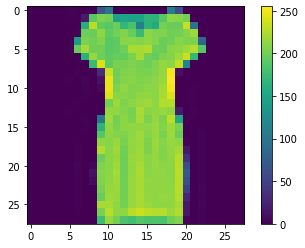

In [67]:
data = tf.keras.datasets.fashion_mnist
# train and test data set
(xtrain, ytrain),(xtest,ytest)=data.load_data()

# visualize the data
idx = 20
img = xtrain[idx]
print("Label :", ytrain[idx])
plt.imshow(img)
plt.colorbar()

Here we see the pixel value ranges from 0 to 250

Visualization

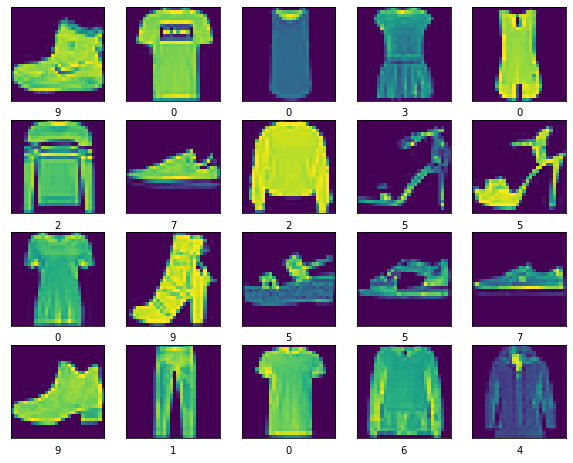

In [68]:
# visualizing first 20 images fromt he training dataset along with their labels

plt.figure(figsize= (10,10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(ytrain[i])

Exploratory data analysis

In [69]:
# check the shape
print(xtrain.shape)
print(len(ytrain))


(60000, 28, 28)
60000


There are 60,000 training images and each image is 28 x 28 pixels.

In [70]:
# check the labels in the training data set
ytrain 

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hence, there are integer labels between 0 to 9.

In [71]:
#check the shape of the test dataset
print(xtest.shape)
print(len(ytest))

(10000, 28, 28)
10000


Preprocessing Data

We saw that the pixel values range from 0 to 255, we will normalize them between 
0 to 1 before using them into our neural network. We will divide the training set and test set values by 255. 

In [72]:
xtrain= xtrain/255.0
xtest = xtest/255.0


Model building

Formatting: the first layers.Flatten transforms the 2-D array of 28 x 28 pixels to 1D array of 28 *28 = 784.
Next we add a non-linear layer 'ReLU' with 128 node and the next Dense layer returns the logits with len 10.


In [76]:
tf.random.set_seed(35)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), 
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(10)
])

# compile the model. Set loss function, optimizer and metrics.
#loss function measures accuracy during training. We want to minimize this.
#optimizer shows how the model is updated based on the data and loss function

model_2.compile(optimizer = 'adam',
               loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics= ['accuracy'])

# training the model by feeding the preprocessed data.
model_2.fit(xtrain, ytrain, epochs=10)

#Evaluate test dataset accuracy
test_loss, test_accuracy = model_2.evaluate(xtest,ytest, verbose = 2)
print('test accuracy:', test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4996 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3719 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3364 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3104 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2920 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2794 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2656 - accuracy: 0.9023
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2560 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2454 - accuracy: 0.9094
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

We see here that the model reached an accuracy of 91% at the end of 10th epoch. However, the test data accuracy is a 
little low, 87.7%. This is due to the overfitting issue of the model.
Ways to handle overfitting:
1. add dropout layers to randomly remove features during training.
2. increase training dataset.
3. have a simpler model with fewer parameters
4. Early stop when your model reaches a good sccuracy.

In [89]:
# Prediction
#added a softmax layer to convert the linear output to probabilities
probability_model_2 = tf.keras.Sequential([model_2, tf.keras.layers.Softmax()])
y_pred = probability_model_2.predict_classes(x=xtest)


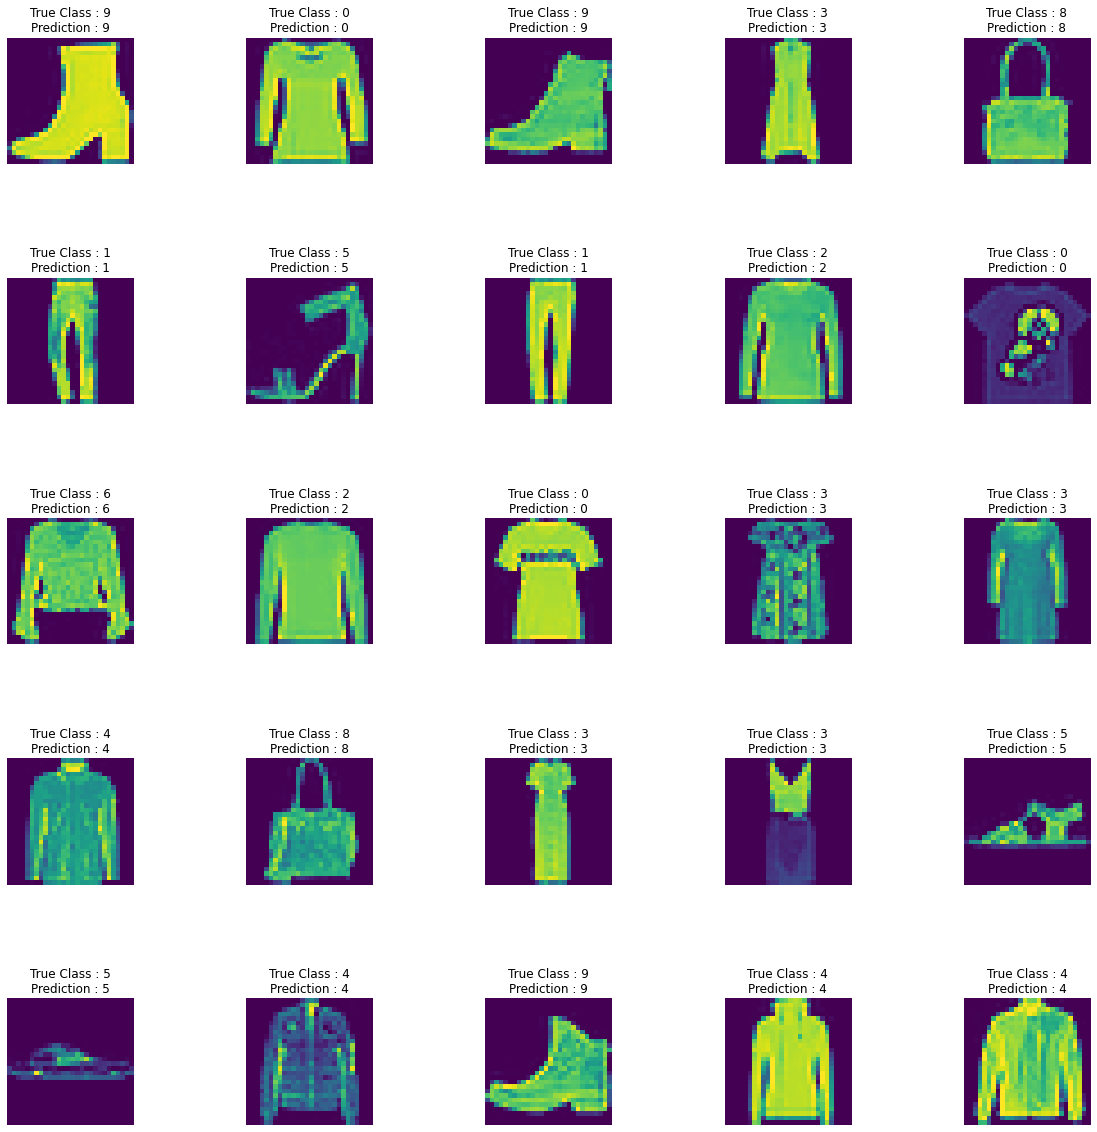

In [92]:
# visualization of our model prediction
height = 5
width = 5

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(20,20))
axes = axes.ravel()
for i in range(0, height*width):
    index = np.random.randint(len(y_pred))
    axes[i].imshow(xtest[index].reshape((28,28)))
    axes[i].set_title("True Class : {:0.0f}\nPrediction : {:d}".format(ytest[index],y_pred[index]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.9, wspace=0.5)


Now we will consolidate a classification report

<AxesSubplot:>

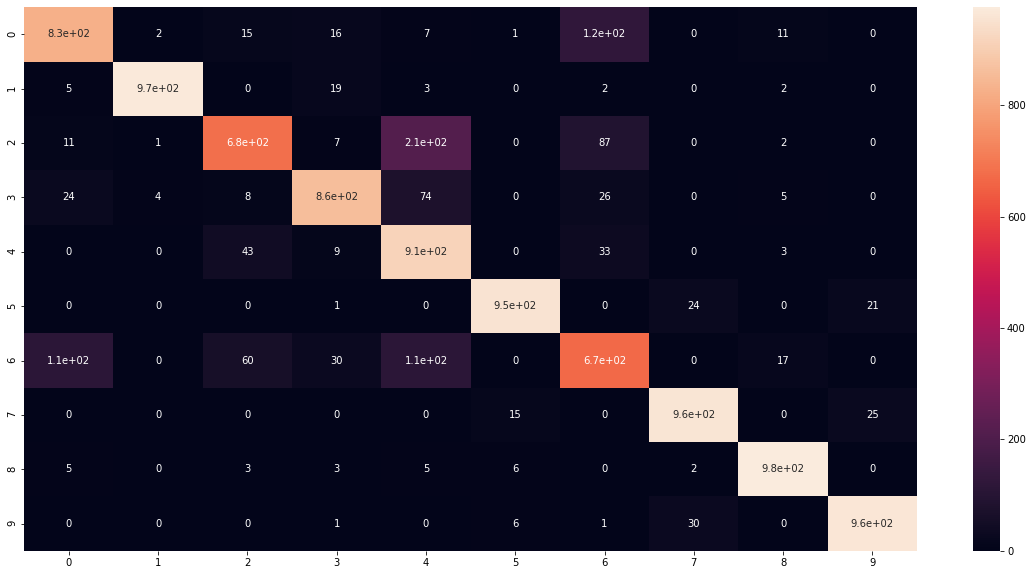

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(20,10))
sns.heatmap(conf_matrix, annot= True)

In [97]:

name= ["class{}". format(x) for x in range(10)]
report= classification_report(ytest,y_pred,target_names=name)
print(report)

              precision    recall  f1-score   support

      class0       0.84      0.83      0.83      1000
      class1       0.99      0.97      0.98      1000
      class2       0.84      0.68      0.75      1000
      class3       0.91      0.86      0.88      1000
      class4       0.69      0.91      0.78      1000
      class5       0.97      0.95      0.96      1000
      class6       0.71      0.67      0.69      1000
      class7       0.94      0.96      0.95      1000
      class8       0.96      0.98      0.97      1000
      class9       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Hence, the model predicts better clas 1, 8, 9 and 7 compared to others.